# Matplotlib

## Exercise 1: Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](../assets/births_gender.png)

Note the `1e6` on the y axis for scale

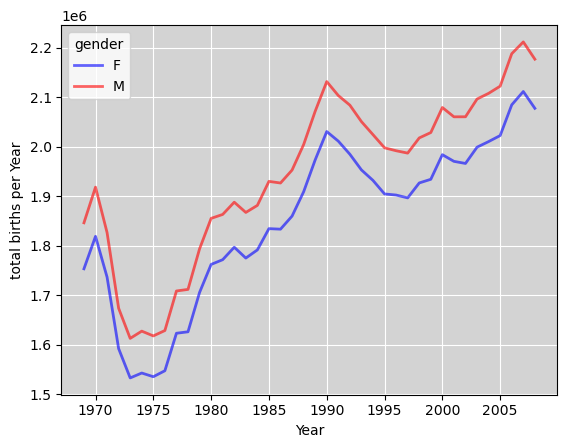

In [122]:
# exercise 1
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


data= pd.read_csv("../data/births.csv")
#Filter to get the total sum of birth per year and per gender
df = data[['year','gender','births']].groupby(['year','gender']).agg(np.sum).reset_index()




fig, ax = plt.subplots()
ax.grid(color='w')


#listGenders = ['F','M']
#for i in range(1):
ax.set_ylabel('total births per Year')
ax.set_xlabel('Year')

grp1 = df[df.gender=='F']
x1 = grp1.year
y1 = grp1.births

grp2 = df.loc[(df['gender']=='M')]
x2 = grp2.year
y2 = grp2.births

label_F = 'F'
label_M = 'M'
t='gender'
ax.plot(x1, y1, 'b-', linewidth=2, label=label_F, alpha=0.6)
ax.plot(x2, y2, 'r-', linewidth=2, label=label_M, alpha=0.6)
ax.legend(loc='upper left', title='gender')
ax.set_facecolor("lightgrey")

plt.show()

## Exercise 2

Reproduce the plot below:

![ex2](../assets/federer.png)

Given the `../data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match.

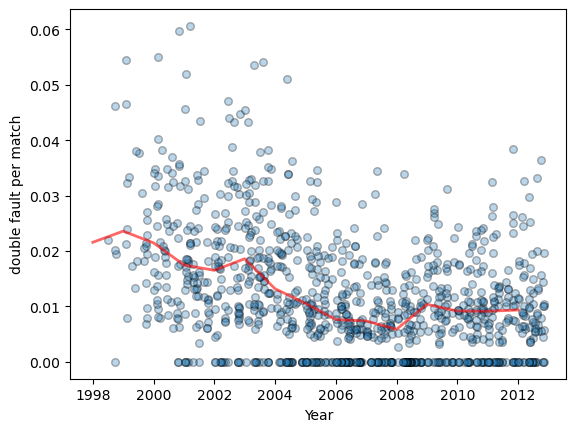

In [298]:
# exercise 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


data= pd.read_csv("../data/tennis.csv")
#Adding a new columns
data['doubleFault_Over_totalPoints']=None
#Adding a new column 
data['averagePerYear']=None

#Filtering Rows on R.Federer, and Columns on 'year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints'
df = data.loc[data['player1 name']=='Roger Federer', ['year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints','averagePerYear']]

#Filling out the new columns
dbleFault = df['player1 double faults']
totalPoints = df['player1 total points total']
df['doubleFault_Over_totalPoints']= dbleFault / totalPoints
df['averagePerYear']=df['doubleFault_Over_totalPoints']


#Filtering columns to remove any NULL from column 'player1 total points total'
df_sliceOnRogerFed =df.loc[(df['player1 name']=='Roger Federer') & (df['player1 double faults'].notnull()) & (df['player1 total points total'].notnull())]

#Creating new column with NewYearDate to fit the previous date format:
df_NYD = pd.DataFrame({'year': [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012],
                   'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   'day': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]})

#GroupBy Year to get the average per year
df_sliceOnRogerFedPerYear = df.groupby(['year'])['averagePerYear'].agg(np.mean).reset_index()
df_sliceOnRogerFedPerYear['newYearDate']=pd.to_datetime(df_NYD[["year", "month", "day"]])
df_sliceOnRogerFedPerYear


#Scatter and plot Settings
fig, ax = plt.subplots()
ax.set_ylabel('double fault per match')
ax.set_xlabel('Year')

x = pd.to_datetime(df_sliceOnRogerFed['start date'])
y = df_sliceOnRogerFed.doubleFault_Over_totalPoints
ax.scatter(x, y, s=30, alpha=0.3, edgecolors="k")

x_mean = pd.to_datetime(df_sliceOnRogerFedPerYear['newYearDate'])
y_mean = df_sliceOnRogerFedPerYear.averagePerYear
ax.plot(x_mean, y_mean, 'r-',linewidth=2, alpha=0.6,)











In [220]:
data= pd.read_csv("../data/tennis.csv")
#Adding a new column containing the DoubleFault/TotalPointsTotal. Y axis
data['doubleFault_Over_totalPoints']=None

#Filtering Rows on R.Federer, and Columns on 'year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints'
df = data.loc[data['player1 name']=='Roger Federer', ['year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints']]

#Filling out the new column 'doubleFault_Over_totalPoints'. Y axis
dbleFault = df['player1 double faults']
totalPoints = df['player1 total points total']
df['doubleFault_Over_totalPoints']= dbleFault / totalPoints

#Filtering columns to remove any NULL from column 'player1 total points total'
df_sliceOnRogerFed =df.loc[(df['player1 name']=='Roger Federer') & (df['player1 double faults'].notnull()) & (df['player1 total points total'].notnull())]



,year,start date,player1 name,player1 double faults,player1 total points total,doubleFault_Over_totalPoints
0,1998,1998-10-05,Roger Federer,2.0,103.0,0.019417
1,1998,1998-09-28,Roger Federer,0.0,106.0,0.000000
2,1998,1998-09-28,Roger Federer,3.0,148.0,0.020270
3,1998,1998-09-28,Roger Federer,6.0,130.0,0.046154
5,1998,1998-07-06,Roger Federer,3.0,136.0,0.022059
...,...,...,...,...,...,...
1173,2012,2012-01-16,Roger Federer,1.0,164.0,0.006098
1174,2012,2012-01-16,Roger Federer,5.0,276.0,0.018116
1175,2012,2012-01-02,Roger Federer,0.0,86.0,0.000000
1176,2012,2012-01-02,Roger Federer,0.0,99.0,0.000000


## Exercise 3: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

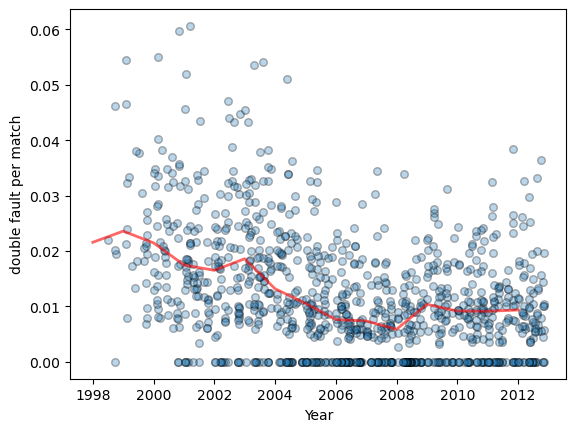

In [321]:
# exercise 3

data= pd.read_csv("../data/tennis.csv")
#Adding a new columns
data['doubleFault_Over_totalPoints']=None
#Adding a new column 
data['averagePerYear']=None

#Filtering Rows on R.Federer, and Columns on 'year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints'
df = data.loc[data['player1 name']=='Roger Federer', ['year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints','averagePerYear']]

#Filling out the new columns
dbleFault = df['player1 double faults']
totalPoints = df['player1 total points total']
df['doubleFault_Over_totalPoints']= dbleFault / totalPoints
df['averagePerYear']=df['doubleFault_Over_totalPoints']

#Filtering columns to remove any NULL from column 'player1 total points total'
df_sliceOnRogerFed =df.loc[(df['player1 name']=='Roger Federer') & (df['player1 double faults'].notnull()) & (df['player1 total points total'].notnull())]

#GroupBy Year to get the average per year
df_sliceOnRogerFedPerYear = df.groupby(['year'])['averagePerYear'].agg(np.mean).reset_index()

#Creating new column with NewYearDate to fit the previous date format:
df_NYD = pd.DataFrame({'year': [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012],
                   'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                   'day': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]})
df_sliceOnRogerFedPerYear['newYearDate']=pd.to_datetime(df_NYD[["year", "month", "day"]])
df_sliceOnRogerFedPerYear


#Scatter and plot Settings
fig, ax = plt.subplots()
ax.set_ylabel('double fault per match')
ax.set_xlabel('Year')

x = pd.to_datetime(df_sliceOnRogerFed['start date'])
y = df_sliceOnRogerFed.doubleFault_Over_totalPoints
ax.scatter(x, y, s=30, alpha=0.3, edgecolors="k")

x_mean = pd.to_datetime(df_sliceOnRogerFedPerYear['newYearDate'])
y_mean = df_sliceOnRogerFedPerYear.averagePerYear
ax.plot(x_mean, y_mean, 'r-',linewidth=2, alpha=0.6,)



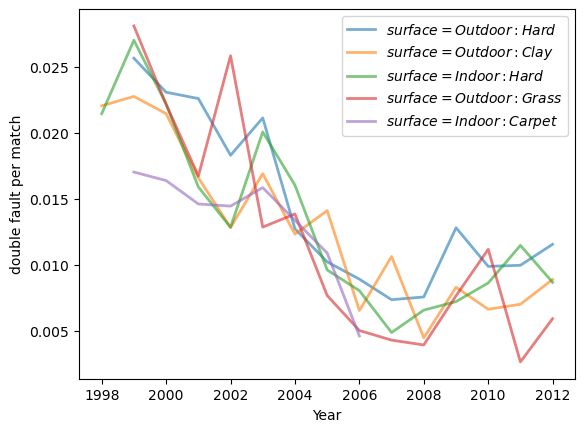

In [336]:
# exercise 3

data= pd.read_csv("../data/tennis.csv")
#Adding a new columns
data['doubleFault_Over_totalPoints']=None
#Adding a new column 
data['averagePerYear']=None

#Filtering Rows on R.Federer, and Columns on 'year','start date','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints'
df = data.loc[data['player1 name']=='Roger Federer', ['year','start date','surface','player1 name','player1 double faults','player1 total points total','doubleFault_Over_totalPoints','averagePerYear']]

#Filling out the new columns
dbleFault = df['player1 double faults']
totalPoints = df['player1 total points total']
df['doubleFault_Over_totalPoints']= dbleFault / totalPoints
df['averagePerYear']=df['doubleFault_Over_totalPoints']

#Filtering columns to remove any NULL from column 'player1 total points total'
df_sliceOnRogerFed =df.loc[(df['player1 name']=='Roger Federer') & (df['player1 double faults'].notnull()) & (df['player1 total points total'].notnull())]


#GroupBy Year to get the average per year. We also remove row containing any None, NaN, or NaT values
df_sliceOnRogerFedPerYear = df.groupby(['year', 'surface'], )['averagePerYear'].agg(np.mean).reset_index().dropna(axis=0)

yearList = df_sliceOnRogerFedPerYear['year']
monthList=[1 for mth in range(0,len(yearList))]
dayList=[1 for day in range(0,len(yearList))]

#Creating new column with NewYearDate to fit the previous date format:
df_NYD = pd.DataFrame({'year': yearList,
                   'month': monthList,
                   'day': dayList})
df_sliceOnRogerFedPerYear['newYearDate']=pd.to_datetime(df_NYD[["year", "month", "day"]])
#Collection of the surface list
listSurfaces = set([surf for surf in df_sliceOnRogerFedPerYear['surface']])

fig, ax = plt.subplots()
ax.set_ylabel('double fault per match')
ax.set_xlabel('Year')
for surf in listSurfaces:
    df_PerSurface = df_sliceOnRogerFedPerYear.loc[df_sliceOnRogerFedPerYear['surface']==surf]
    #Plot Settings
    x = pd.to_datetime(df_PerSurface['newYearDate'])
    y = df_PerSurface.averagePerYear
    current_label = f'$surface = {surf}$'
    ax.plot(x, y,linewidth=2, alpha=0.6, label = current_label)
ax.legend()
plt.show()




## Exercise 4: Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

<img src="../assets/births_gp100.png" style="max-width: 600px;" />

**4.1**  Attempt to BRIEFLY explain the three plots in Gelman's figure. 

In [2]:
# exercise 4.1 (explain here)
Top Graph:Relative number of birth
   - Births Curve:It shows the total number of birth per day during 12 month
   - Smoothed Curve: it shows the local average of the Births Curve
   - Mean: it shows the global average of the Births Curve
From January to June the Smoothed Curve is relatively steady between 95 to 98 births/day.
It start rising by Mid-June above the annual mean at 100 birth/day.
From July until Mid-October, the rate is higher than the annual MEAN, 
and reaches a peak at about 110 birth/day in Mid-september.
Mi-October the rate is back under the MEAN at around 97 birth/day.
By Mid-December, the rate climbs back again aboce the MEAN at around 105 birth/day.

    
The periodic component indicate the frequency of measures reporting is increases between March and april.
Then in the 1st Mid-august, then from Mi-september to the end of the year

The Residual shows a few special day of the year are not corrctely match the reality.
January 1st, July 4th, Dec 24th/25th are indicating a sharp decine in birth.
Because these day are usually holidays, the reporting is probably not done, or people go deliver elsewhere.
Feb 14th is also a special day. More birth are reported on this day.

**4.2** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

In [3]:
# exercise 4.2 (explain here)

Residuals: Ref. Google 
in a statistical or machine learning model are the differences between observed and predicted values 
of data. They are a diagnostic measure used when assessing the quality of a model. They are also known as errors

Periodicity: https://stats.oecd.org/glossary/detail.asp?ID=2041
The periodicity of a particular data category is determined by several factors, including the ease of observation
or compilation and the needs of analysis. 
Periodicity is usually expressed in terms of divisions of the calendar (e.g. monthly, quarterly). 
Periodicity of original data refers to the frequency of compilation of data by the source agency, 
i.e. the national agency or international organisation that provided the information. 